### Simulation

In [9]:
from bmc.simulate import simulate
import numpy as np
import matplotlib.pyplot as plt

In [10]:
low = -20e-6
high = 20e-6
n_iso = 1000

z_pos = np.linspace(low, high, n_iso)
z_pos = np.append(z_pos, 0.)
z_pos = np.sort(z_pos)  

In [11]:
seq_path_on = [f'seq_lib/ETM_variation/{i}_ETM.seq' for i in range(0, 251, 10)]
seq_path_off = [f'seq_lib/ETM_variation/{i}_ETM_minus.seq' for i in range(0, 251, 10)]
config_path = 'sim_lib/config_1pool.yaml'

In [12]:
adc_time = 6e-3
retun_zmag = False
write_all_mag = True
webhook = False
plt_range = [0, 4]
iso_select = [-5,0,5]

len(seq_path_on)

26

In [13]:
from bmc.utils.tex_variation import run_variation

In [ ]:
N_ETM, signal = run_variation(seq_path_on,
                             seq_path_off,
                             config_path,
                             adc_time,
                             z_pos,
                             webhook,
                             num_points = len(seq_path_on),
                             batch_size=4,
                             max_processes=4)

BMCTool simulation:   0%|          | 0/3 [00:00<?, ?it/s]

['rf at 0.0000s', 'gz at 0.0020s', 'adc at 0.0025s']
[]


BMCTool simulation: 100%|██████████| 3/3 [00:05<00:00,  1.89s/it]s]


['rf at 0.0000s', 'gz at 0.0020s', 'adc at 0.0025s']
[]


BMCTool simulation:   0%|          | 0/63 [00:00<?, ?it/s]

['rf at 0.0000s', 'delay at 0.0020s', 'gz at 0.0025s', 'delay at 0.0030s', 'rf at 0.0035s', 'delay at 0.0055s', 'rf at 0.0135s', 'delay at 0.0155s', 'gz at 0.0160s', 'delay at 0.0165s', 'rf at 0.0170s', 'delay at 0.0190s', 'rf at 0.0270s', 'delay at 0.0290s', 'gz at 0.0295s', 'delay at 0.0300s', 'rf at 0.0305s', 'delay at 0.0325s', 'rf at 0.0405s', 'delay at 0.0425s', 'gz at 0.0430s', 'delay at 0.0435s', 'rf at 0.0440s', 'delay at 0.0460s', 'rf at 0.0540s', 'delay at 0.0560s', 'gz at 0.0565s', 'delay at 0.0570s', 'rf at 0.0575s', 'delay at 0.0595s', 'rf at 0.0675s', 'delay at 0.0695s', 'gz at 0.0700s', 'delay at 0.0705s', 'rf at 0.0710s', 'delay at 0.0730s', 'rf at 0.0810s', 'delay at 0.0830s', 'gz at 0.0835s', 'delay at 0.0840s', 'rf at 0.0845s', 'delay at 0.0865s', 'rf at 0.0945s', 'delay at 0.0965s', 'gz at 0.0970s', 'delay at 0.0975s', 'rf at 0.0980s', 'delay at 0.1000s', 'rf at 0.1080s', 'delay at 0.1100s', 'gz at 0.1105s', 'delay at 0.1110s', 'rf at 0.1115s', 'delay at 0.1135s', 

BMCTool simulation:   0%|          | 0/123 [00:00<?, ?it/s]

['rf at 0.0000s', 'delay at 0.0020s', 'gz at 0.0025s', 'delay at 0.0030s', 'rf at 0.0035s', 'delay at 0.0055s', 'rf at 0.0135s', 'delay at 0.0155s', 'gz at 0.0160s', 'delay at 0.0165s', 'rf at 0.0170s', 'delay at 0.0190s', 'rf at 0.0270s', 'delay at 0.0290s', 'gz at 0.0295s', 'delay at 0.0300s', 'rf at 0.0305s', 'delay at 0.0325s', 'rf at 0.0405s', 'delay at 0.0425s', 'gz at 0.0430s', 'delay at 0.0435s', 'rf at 0.0440s', 'delay at 0.0460s', 'rf at 0.0540s', 'delay at 0.0560s', 'gz at 0.0565s', 'delay at 0.0570s', 'rf at 0.0575s', 'delay at 0.0595s', 'rf at 0.0675s', 'delay at 0.0695s', 'gz at 0.0700s', 'delay at 0.0705s', 'rf at 0.0710s', 'delay at 0.0730s', 'rf at 0.0810s', 'delay at 0.0830s', 'gz at 0.0835s', 'delay at 0.0840s', 'rf at 0.0845s', 'delay at 0.0865s', 'rf at 0.0945s', 'delay at 0.0965s', 'gz at 0.0970s', 'delay at 0.0975s', 'rf at 0.0980s', 'delay at 0.1000s', 'rf at 0.1080s', 'delay at 0.1100s', 'gz at 0.1105s', 'delay at 0.1110s', 'rf at 0.1115s', 'delay at 0.1135s', 

BMCTool simulation: 100%|██████████| 63/63 [01:18<00:00,  1.25s/it]


['rf at 0.0000s', 'delay at 0.0020s', 'gz at 0.0025s', 'delay at 0.0030s', 'rf at 0.0035s', 'delay at 0.0055s', 'rf at 0.0135s', 'delay at 0.0155s', 'gz at 0.0160s', 'delay at 0.0165s', 'rf at 0.0170s', 'delay at 0.0190s', 'rf at 0.0270s', 'delay at 0.0290s', 'gz at 0.0295s', 'delay at 0.0300s', 'rf at 0.0305s', 'delay at 0.0325s', 'rf at 0.0405s', 'delay at 0.0425s', 'gz at 0.0430s', 'delay at 0.0435s', 'rf at 0.0440s', 'delay at 0.0460s', 'rf at 0.0540s', 'delay at 0.0560s', 'gz at 0.0565s', 'delay at 0.0570s', 'rf at 0.0575s', 'delay at 0.0595s', 'rf at 0.0675s', 'delay at 0.0695s', 'gz at 0.0700s', 'delay at 0.0705s', 'rf at 0.0710s', 'delay at 0.0730s', 'rf at 0.0810s', 'delay at 0.0830s', 'gz at 0.0835s', 'delay at 0.0840s', 'rf at 0.0845s', 'delay at 0.0865s', 'rf at 0.0945s', 'delay at 0.0965s', 'gz at 0.0970s', 'delay at 0.0975s', 'rf at 0.0980s', 'delay at 0.1000s', 'rf at 0.1080s', 'delay at 0.1100s', 'gz at 0.1105s', 'delay at 0.1110s', 'rf at 0.1115s', 'delay at 0.1135s', 

BMCTool simulation: 100%|██████████| 123/123 [02:29<00:00,  1.22s/it]


['rf at 0.0000s', 'delay at 0.0020s', 'gz at 0.0025s', 'delay at 0.0030s', 'rf at 0.0035s', 'delay at 0.0055s', 'rf at 0.0135s', 'delay at 0.0155s', 'gz at 0.0160s', 'delay at 0.0165s', 'rf at 0.0170s', 'delay at 0.0190s', 'rf at 0.0270s', 'delay at 0.0290s', 'gz at 0.0295s', 'delay at 0.0300s', 'rf at 0.0305s', 'delay at 0.0325s', 'rf at 0.0405s', 'delay at 0.0425s', 'gz at 0.0430s', 'delay at 0.0435s', 'rf at 0.0440s', 'delay at 0.0460s', 'rf at 0.0540s', 'delay at 0.0560s', 'gz at 0.0565s', 'delay at 0.0570s', 'rf at 0.0575s', 'delay at 0.0595s', 'rf at 0.0675s', 'delay at 0.0695s', 'gz at 0.0700s', 'delay at 0.0705s', 'rf at 0.0710s', 'delay at 0.0730s', 'rf at 0.0810s', 'delay at 0.0830s', 'gz at 0.0835s', 'delay at 0.0840s', 'rf at 0.0845s', 'delay at 0.0865s', 'rf at 0.0945s', 'delay at 0.0965s', 'gz at 0.0970s', 'delay at 0.0975s', 'rf at 0.0980s', 'delay at 0.1000s', 'rf at 0.1080s', 'delay at 0.1100s', 'gz at 0.1105s', 'delay at 0.1110s', 'rf at 0.1115s', 'delay at 0.1135s', 

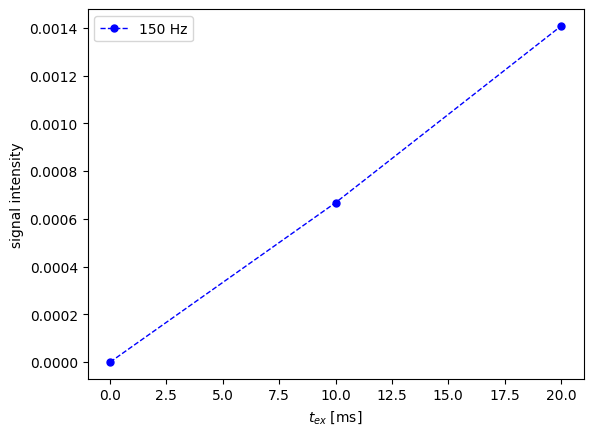

In [15]:
fig, ax = plt.subplots(dpi=100)


plt.plot(N_ETM, signal, 'o--', c='blue', linewidth=1, markersize=5, label='150 Hz')
# plt.plot(t_exc * 1000, signal_250Hz, 'o--', c='red', linewidth=1, markersize=5, label='250 Hz')
# plt.plot(t_exc * 1000, signal_350Hz, 'o--', c='green', linewidth=1, markersize=5, label='250 Hz')
# plt.plot(t_exc * 1000, signal_50Hz, 'o--', c='fuchsia', linewidth=1, markersize=5, label='50 Hz')
# plt.plot(t_exc * 1000, signal_20Hz, 'o--', c='gold', linewidth=1, markersize=5, label='20 Hz')
# plt.plot(t_exc * 1000, signal_350Hz, 'o--', c='green', linewidth=1, markersize=5, label='250 Hz')
# plt.axhline(torch.max(signal).item(), color='blue', linewidth=.8)
# plt.axvline(30, color='blue', linewidth=.8)
# plt.text(30, plt.ylim()[0] - 0.0001, f"{30} ms",
#          color='blue', ha='center', va='top', fontsize=8)
ax.set_ylabel('signal intensity')
ax.set_xlabel(r'$t_{ex}$ [ms]')
ax.legend()
# plt.xlim(0, 65)
# plt.ylim(0.0, 0.0082)


# plt.savefig("signal_plot_kex.png", dpi=300, bbox_inches='tight')
